<a href="https://colab.research.google.com/github/Sudarshan-info/PROJECT-DATASET/blob/main/Iris_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Flower classification is a simple ML project popular among begineers.
Dataset source is kaggle.

> Add blockquote



Step 1: Import necessary libraries

In [2]:
# prompt: Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Load your dataset

In [5]:
#loading dataset from github reposiratory
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
df = pd.read_csv(url)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Step 3: Data Exploration






In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


There are no missing data but id column is redundant so we drop it

In [7]:
df.drop('Id',axis=1,inplace=True)

In [9]:
df.head()
#to check whether id column has been dropped or not

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Step 4: Data Visualization

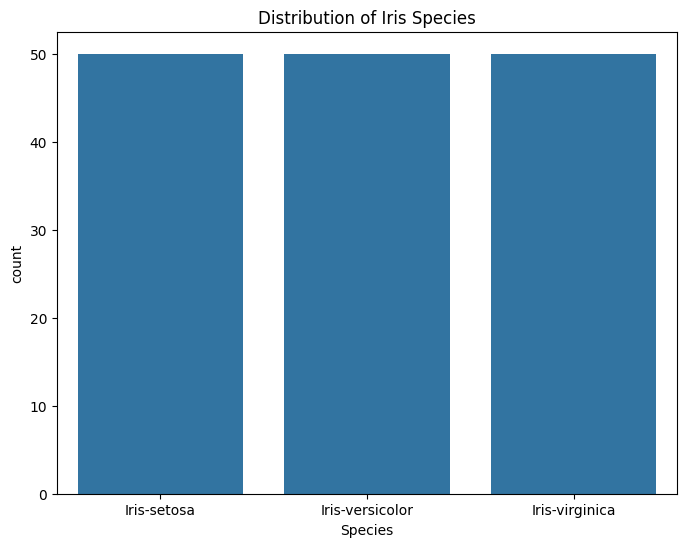

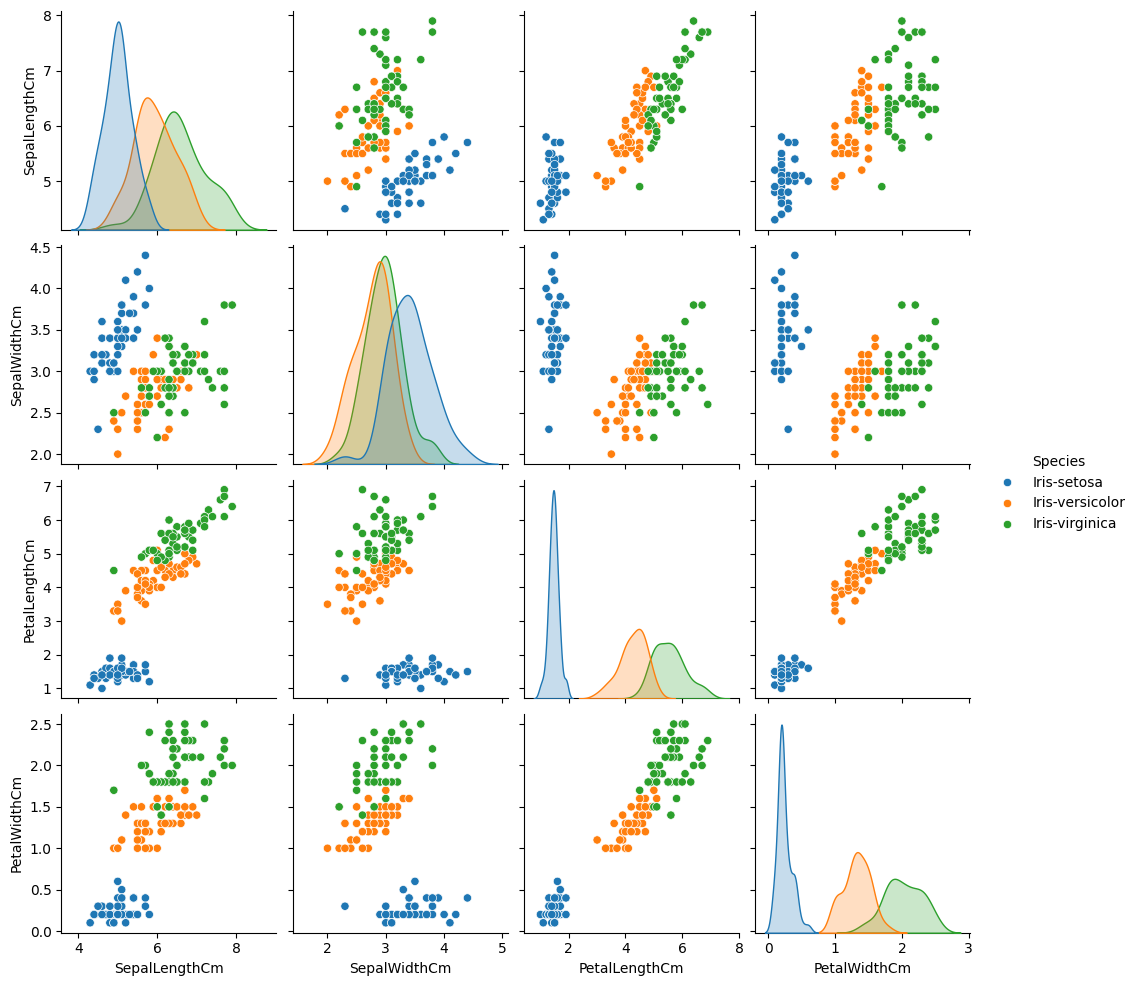

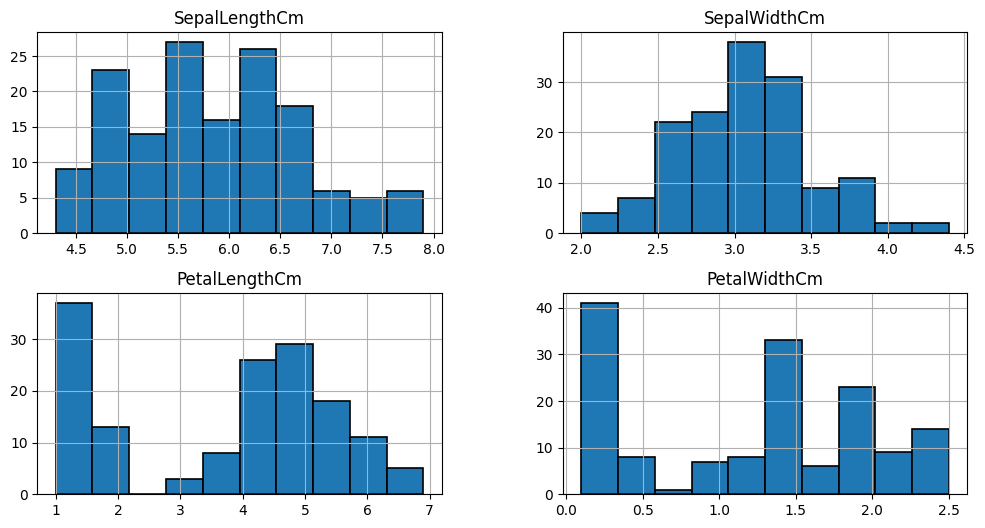

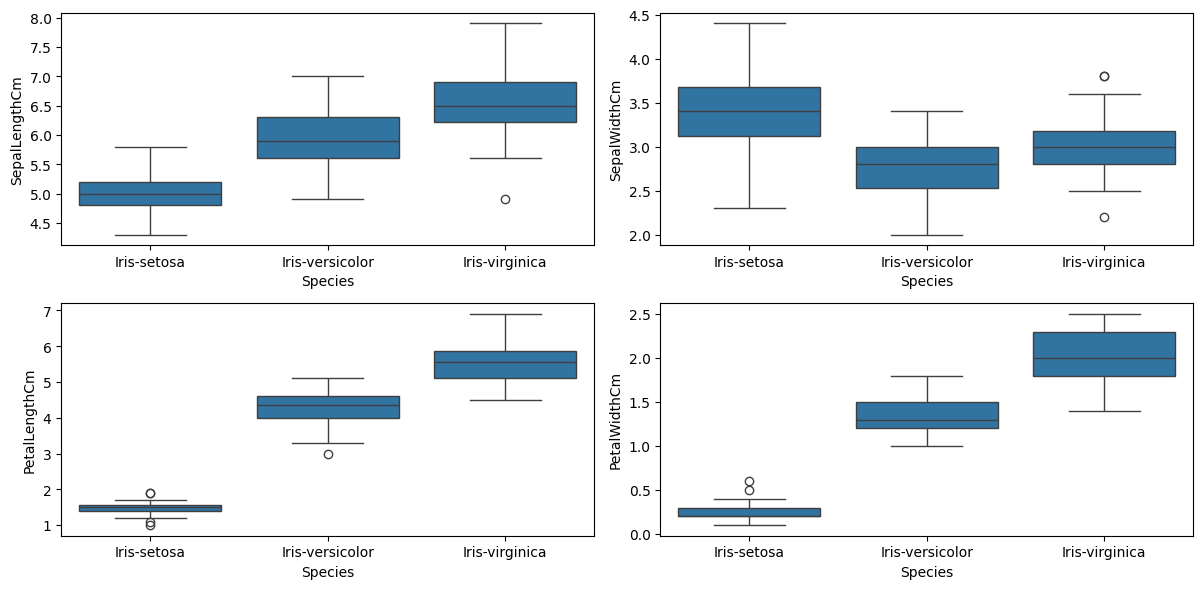

In [11]:
import matplotlib.pyplot as plt
# Visualize the distribution of the target variable 'Species'
plt.figure(figsize=(8, 6))
sns.countplot(x='Species', data=df)
plt.title('Distribution of Iris Species')
plt.show()

# Visualize the relationships between numerical features
sns.pairplot(df, hue='Species')
plt.show()

# Visualize the distributions of individual numerical features
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

# Create box plots to visualize the distribution of features by species
plt.figure(figsize=(12, 6))
plt.subplot(2,2,1)
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.tight_layout()
plt.show()

Step 5: Data Separation
.Separate data into training and testing data set


In [10]:

from sklearn.model_selection import train_test_split

X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


check data seperation

In [13]:
print(X)
print(y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

Step 6: Create your ML model

MODEL 1 : Support Vector Machine

Create a model

In [20]:
from sklearn.svm import SVC
model1 = SVC(kernel='linear', C=1.0, random_state=42)
#kernal can be chosen between linear, ruby, poly
#linear is chosen as it is simple and just tries to find a straight hyperplane that seperates the class

Train/Fit the model1

In [22]:
model1.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

Predict the result using model1(SVM)

In [31]:
y_pred1 = model1.predict(X_test)

Compare the result / Find accuracy of the model

In [32]:
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("\nClassification Report:\n", classification_report(y_test, y_pred1))

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



MODEL 2: Multinomial logistic regression

Create a logistic regression model

In [28]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(multi_class='multinomial', solver='lbfgs')

Train/Fit the model

In [29]:
model2.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

predict the result using model2(Logistic regression)

In [33]:
y_pred2 = model2.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



MODEL 3 : Decission Tree Classifier

Create a model, train the model and predict using the model

In [36]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=42)

# Train/Fit the model
model3.fit(X_train, y_train)

# Predict the result using model3
y_pred3 = model3.predict(X_test)

# Compare the result / Find accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("\nClassification Report:\n", classification_report(y_test, y_pred3))

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Step 7 : Confusion Matrix

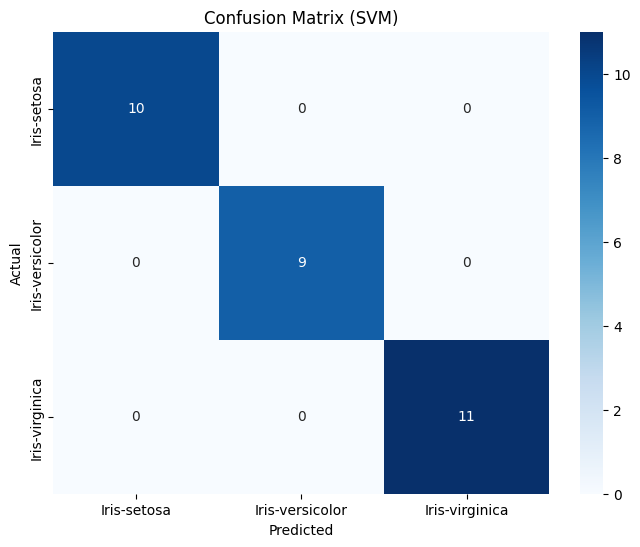

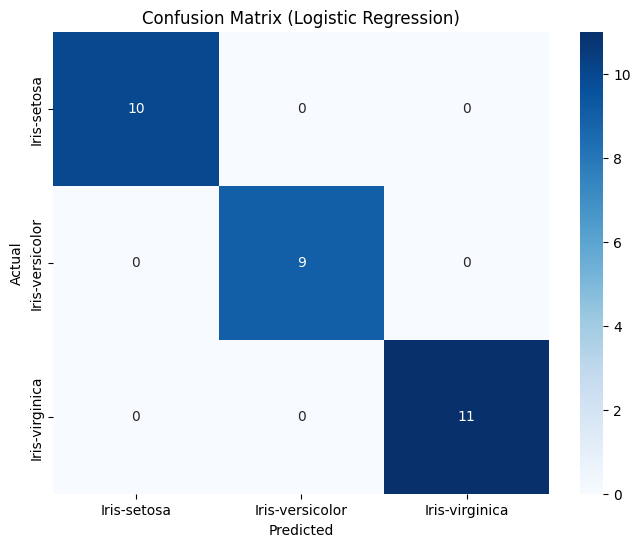

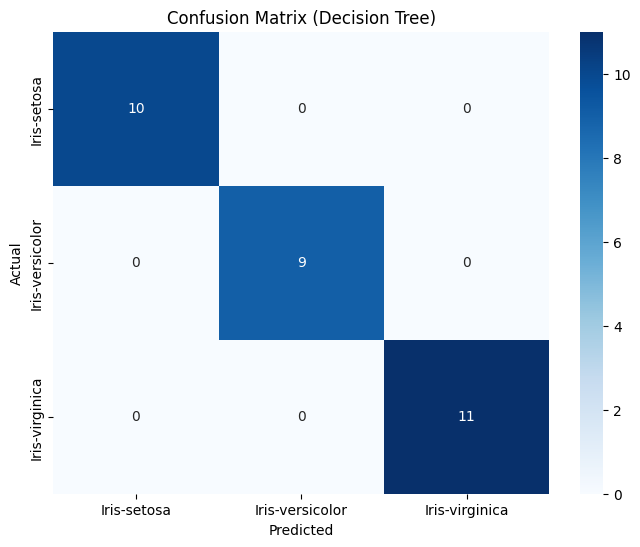

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# For Model 1 (SVM)
cm1 = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=model1.classes_, yticklabels=model1.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

# For Model 2 (Logistic Regression)
cm2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=model2.classes_, yticklabels=model2.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# For Model 3 (Decision Tree)
cm3 = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=model3.classes_, yticklabels=model3.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()


Step 8 : Generalization on user input data

In [41]:
print("\nEnter data for prediction:")
sepal_length = float(input("Sepal Length (cm): "))
sepal_width = float(input("Sepal Width (cm): "))
petal_length = float(input("Petal Length (cm): "))
petal_width = float(input("Petal Width (cm): "))

user_data = pd.DataFrame({
    'SepalLengthCm': [sepal_length],
    'SepalWidthCm': [sepal_width],
    'PetalLengthCm': [petal_length],
    'PetalWidthCm': [petal_width]
})

# Predict using all models
prediction_svm = model1.predict(user_data)
prediction_lr = model2.predict(user_data)
prediction_dt = model3.predict(user_data)

print("\nPredictions based on user input:")
print("SVM Prediction:", prediction_svm[0])
print("Logistic Regression Prediction:", prediction_lr[0])
print("Decision Tree Prediction:", prediction_dt[0])
# You can take this input or try new input [[5.1, 3.5, 1.4, 0.2]] NOTE: this should be classified as Setosa


Enter data for prediction:
Sepal Length (cm): 5.1
Sepal Width (cm): 3.5
Petal Length (cm): 1.4
Petal Width (cm): 0.2

Predictions based on user input:
SVM Prediction: Iris-setosa
Logistic Regression Prediction: Iris-setosa
Decision Tree Prediction: Iris-setosa


CONCLUSION


As this dataset derived from kaggle is a small, clean, and well-structured dataset with clearly separable classes. In this project,I trained multiple classification models (Logistic Regression, SVM, Decision Tree,) to classify iris flower species based on sepal and petal measurements.

All models achieved 100% accuracy, indicating that the dataset is highly learnable and that the species are well-separated by their features. This also suggests that even simple models are sufficient to accurately classify iris species.

However, since the dataset is small and ideal, real-world performance on noisy or overlapping data would require more robust validation, feature engineering, and possibly more complex models.